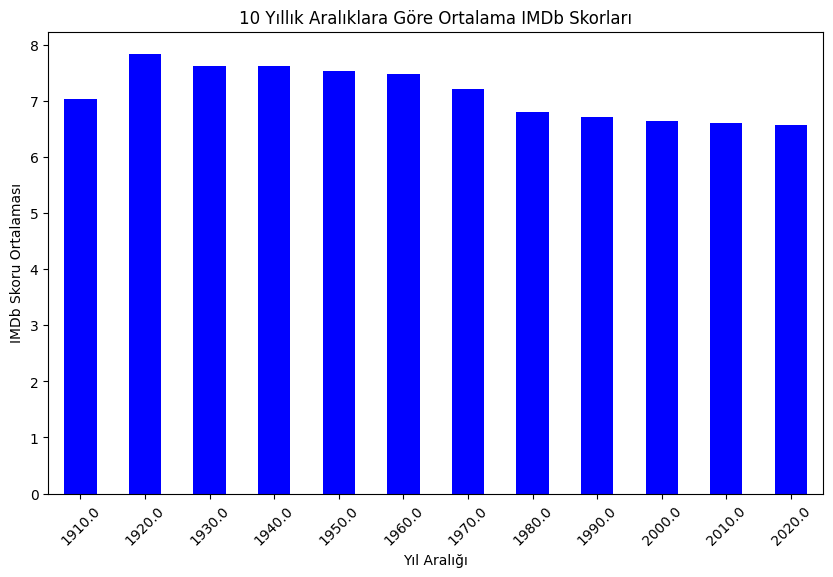

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data.csv')

# Yıl sütununu integer'a dönüştürme
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Yıl ve imdb skorlarını içeren bir alt küme oluşturma
year_imdb = data[['year', 'imdb']]

# Yılları 10'ar yıllık aralıklara göre gruplama
year_groups = year_imdb.groupby((year_imdb['year'] // 10) * 10)

# Her 10 yıllık grupta imdb skorlarının ortalamasını hesaplama
mean_scores = year_groups['imdb'].mean()

# Grafik çizimi
plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar', color='blue')
plt.title("10 Yıllık Aralıklara Göre Ortalama IMDb Skorları")
plt.xlabel("Yıl Aralığı")
plt.ylabel("IMDb Skoru Ortalaması")
plt.xticks(rotation=45)
plt.show()


In [20]:
genre_ratings = {}
imdb_data = pd.read_csv('data.csv')

for index, row in imdb_data.iterrows():
    genres = row['genre'].split(',')
    for genre in genres:
        genre = genre.strip()  # Boşlukları temizle
        imdb_rating = float(row['imdb'])
        if genre in genre_ratings:
            genre_ratings[genre].append(imdb_rating)
        else:
            genre_ratings[genre] = [imdb_rating]

genre_avg_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

print(genre_avg_ratings)


{'Drama': 6.942386131883037, 'Crime': 6.77596199524945, 'Animation': 6.968267223382052, 'Action': 6.564899598393588, 'Adventure': 6.650447227191424, 'Comedy': 6.590678433535536, 'Biography': 7.118550724637673, 'History': 7.073219373219367, 'Mystery': 6.564344637946824, 'Thriller': 6.55327327327327, 'Fantasy': 6.506284916201104, 'Sci-Fi': 6.483431952662718, 'Romance': 6.72362700228832, 'Western': 7.149107142857141, 'Horror': 6.207526881720433, 'Family': 6.583514099783073, 'Music': 6.88297872340426, 'War': 7.210504201680667, 'Sport': 6.770588235294118, 'Film-Noir': 7.6672131147541, 'Musical': 7.012030075187968}


In [21]:
genre_counts = {}

for index, row in imdb_data.iterrows():
    genres = row['genre'].split(',')
    for genre in genres:
        genre = genre.strip()
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

print("Genre Counts:")
for genre, count in sorted_genres:
    print(f"{genre}: {count}")

Genre Counts:
Drama: 5884
Comedy: 3626
Action: 2490
Crime: 2105
Romance: 1748
Adventure: 1677
Thriller: 1665
Horror: 1209
Mystery: 1091
Fantasy: 716
Biography: 690
Sci-Fi: 676
Animation: 479
Family: 461
History: 351
Music: 282
War: 238
Sport: 204
Musical: 133
Western: 112
Film-Noir: 61


C:\Users\mertc\AppData\Local\Temp\ipykernel_4260\1441898709.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(genres, rotation=90, ha='right')


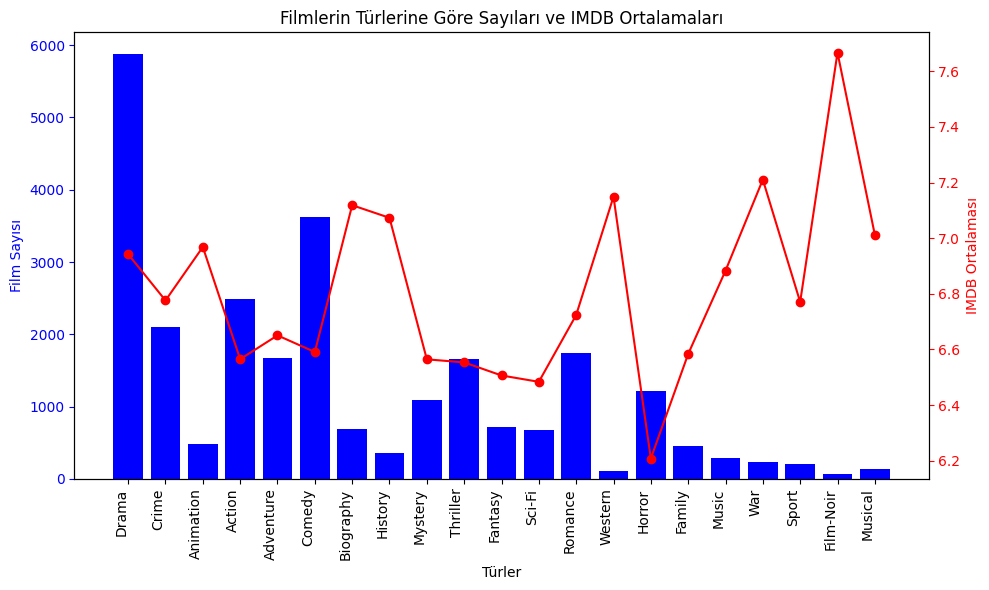

In [22]:
import matplotlib.pyplot as plt

genre_counts = {}
genre_imdb_avg = {}

for index, row in imdb_data.iterrows():
    genres = row['genre'].split(',')
    imdb_score = row['imdb']

    for genre in genres:
        genre = genre.strip()
        if genre in genre_counts:
            genre_counts[genre] += 1
            genre_imdb_avg[genre] += imdb_score
        else:
            genre_counts[genre] = 1
            genre_imdb_avg[genre] = imdb_score

# IMDB ortalamalarını hesapla
for genre in genre_imdb_avg:
    genre_imdb_avg[genre] /= genre_counts[genre]

# Çubuk grafik oluştur
genres = list(genre_counts.keys())
counts = list(genre_counts.values())
imdb_avgs = list(genre_imdb_avg.values())

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(genres, counts, color='blue')
ax1.set_xlabel('Türler')
ax1.set_ylabel('Film Sayısı', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticklabels(genres, rotation=90, ha='right')

ax2 = ax1.twinx()
ax2.plot(genres, imdb_avgs, color='red', marker='o')
ax2.set_ylabel('IMDB Ortalaması', color='red')
ax2.tick_params('y', colors='red')

plt.title('Filmlerin Türlerine Göre Sayıları ve IMDB Ortalamaları')
plt.tight_layout()
plt.show()


In [23]:
actor_film_counts = {}

for index, row in imdb_data.iterrows():
    actors = row['actors']

    if isinstance(actors, str):  # NaN kontrolü
        actor_list = actors.split('\t')

        for actor in actor_list:
            actor = actor.strip()
            if actor in actor_film_counts:
                actor_film_counts[actor] += 1
            else:
                actor_film_counts[actor] = 1


In [24]:
top_10_actors = sorted(actor_film_counts.items(), key=lambda x: x[1], reverse=True)[:10]

for actor, film_count in top_10_actors:
    print(f"{actor}: {film_count} films")


Robert De Niro: 71 films
Nicolas Cage: 63 films
Samuel L. Jackson: 62 films
Bruce Willis: 55 films
Tom Hanks: 54 films
Morgan Freeman: 52 films
Clint Eastwood: 49 films
Johnny Depp: 49 films
Nicole Kidman: 49 films
Liam Neeson: 48 films


C:\Users\mertc\AppData\Local\Temp\ipykernel_4260\1407360547.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(actors, rotation=90)


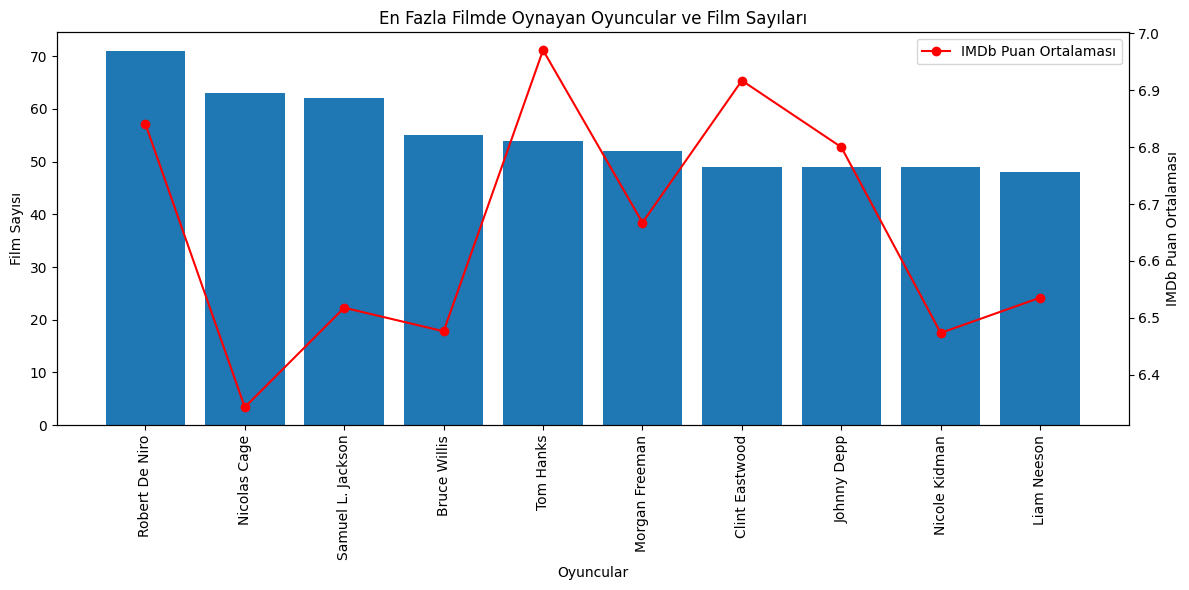

In [25]:
import matplotlib.pyplot as plt

actor_info = []
for actor, movie_count in top_10_actors:
    actor_movies = imdb_data[imdb_data['actors'].apply(lambda x: actor in str(x))]
    average_rating = actor_movies['imdb'].mean()
    actor_info.append((actor, movie_count, average_rating))

# Sıralı aktör bilgileri
sorted_actor_info = sorted(actor_info, key=lambda x: x[1], reverse=True)

# Grafik için x ve y değerlerini belirler
actors = [actor for actor, _, _ in sorted_actor_info]
film_counts = [movie_count for _, movie_count, _ in sorted_actor_info]
average_ratings = [average_rating for _, _, average_rating in sorted_actor_info]

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(actors, film_counts, label='Film Sayısı')
ax.set_xlabel('Oyuncular')
ax.set_ylabel('Film Sayısı')
ax.set_title('En Fazla Filmde Oynayan Oyuncular ve Film Sayıları')
ax.set_xticklabels(actors, rotation=90)
ax2 = ax.twinx()
ax2.plot(actors, average_ratings, color='red', marker='o', label='IMDb Puan Ortalaması')
ax2.set_ylabel('IMDb Puan Ortalaması')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [26]:
director_film_counts = data['director'].value_counts().to_dict()
top_10_directors = sorted(director_film_counts.items(), key=lambda x: x[1], reverse=True)[:10]

for director, film_count in top_10_directors:
    print(f"{director}: {film_count} films")


Woody Allen: 48 films
Alfred Hitchcock: 37 films
Clint Eastwood: 37 films
Steven Spielberg: 33 films
Ridley Scott: 27 films
Steven Soderbergh: 27 films
Ron Howard: 26 films
Martin Scorsese: 24 films
Brian De Palma: 21 films
Richard Linklater: 20 films


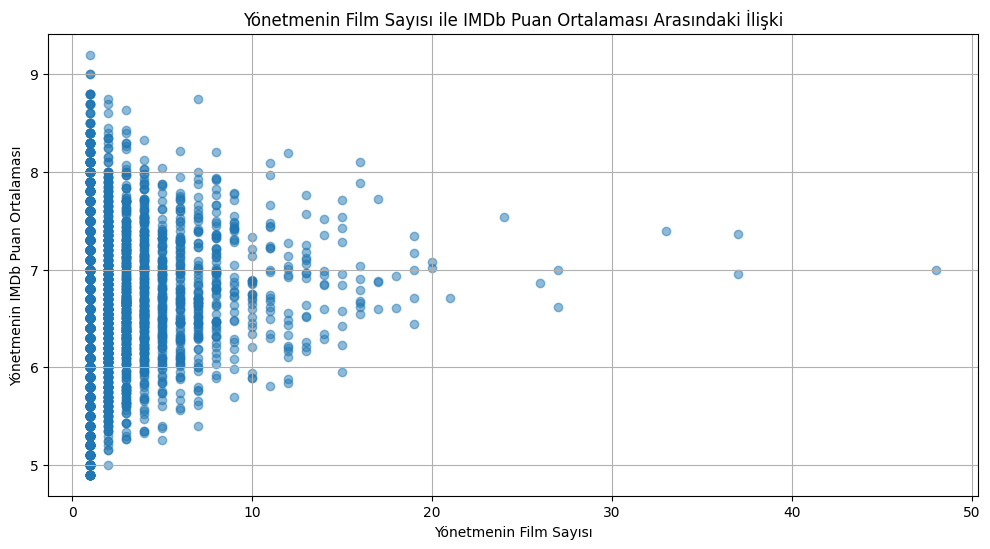

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

director_counts = data['director'].value_counts()
director_avg_imdb = data.groupby('director')['imdb'].mean()


director_data = pd.DataFrame({'Film Sayısı': director_counts, 'IMDb Ortalaması': director_avg_imdb})

# Plot grafiğini oluştur
plt.figure(figsize=(12, 6))
plt.scatter(director_data['Film Sayısı'], director_data['IMDb Ortalaması'], alpha=0.5)
plt.xlabel('Yönetmenin Film Sayısı')
plt.ylabel('Yönetmenin IMDb Puan Ortalaması')
plt.title('Yönetmenin Film Sayısı ile IMDb Puan Ortalaması Arasındaki İlişki')
plt.grid(True)
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

certificate_counts = data['certificate'].value_counts()[:10]

print("Certificate Türleri ve Film Sayıları:")
print(certificate_counts)

Certificate Türleri ve Film Sayıları:
certificate
R        2037
PG-13    1008
13+       777
18+       758
15+       558
PG        393
G         334
7+        315
16+       314
13A       228
Name: count, dtype: int64


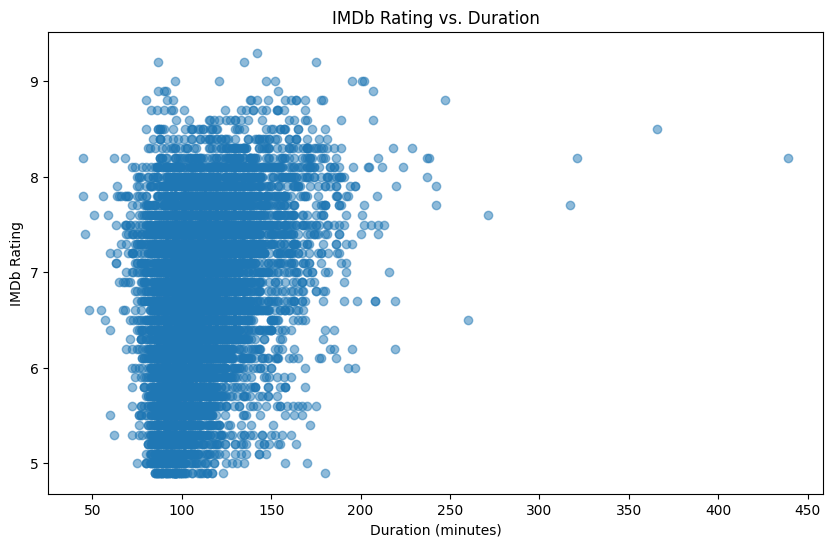

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

data['duration'] = data['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(data['duration'], data['imdb'], alpha=0.5)  # alpha, noktaların saydamlığını ayarlar

plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating vs. Duration')

plt.show()